# Descriptive Stats

We now have a compelte dataset of the patents and the tracts they fall into. This workbook aims to explore our data and provide some visualisations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_patent_tracts = pd.read_csv("edited_patent_tract.csv")
state_names_df = pd.read_csv("/Users/yusufsohoye/Google Drive/Dissertation/mapping_stage/qgis/tract_state_keys.csv")
df = pd.merge(df_patent_tracts, state_names_df, how='inner', left_on = 'STATEFP', right_on = 'State ID')



#Cleaning up the tract ids

#turnnig them into str, to easier match
#df['STATEFP']= df['STATEFP'].astype(str)
#df['COUNTYFP']= df['COUNTYFP'].astype(str)
#df['TRACTCE']= df['TRACTCE'].astype(str)
#df['GEOID']= df['GEOID'].astype(str)

#removing the trailing 0's
#df['STATEFP']= df['STATEFP'].str[:-2]
#df['COUNTYFP']= df['COUNTYFP'].str[:-2]
#df['TRACTCE']= df['TRACTCE'].str[:-2]
#df['GEOID']= df['GEOID'].str[:-2]
#df['STATEFP'] = df['STATEFP'].str.zfill(2)

Just checking the data, it seems we have no location data for around 500 of the patents, this may be due to the mislabeling of certian patents, that may have not been in the USA, or the long/lat may have fallen out of the area of our tracts.

In [3]:
print(df.isna().sum())

Unnamed: 0       0
patent_id        0
date             0
title            1
section_id       0
inventor_id      0
city           467
state          467
it_cited         0
cited_by         0
STATEFP          0
COUNTYFP         0
TRACTCE          0
GEOID            0
NAME             0
NAMELSAD         0
State ID         0
State Name       0
dtype: int64


## State level patent and citation
Finding the patent count in each city, displaying in a pie chart


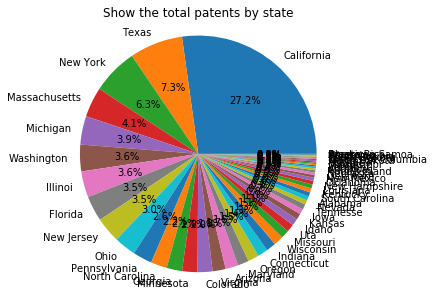

In [4]:
state_count = df.groupby('State Name')['patent_id'].nunique().to_frame('total_patents').reset_index().sort_values(by=['total_patents'],ascending=False)

plt.pie(
    # using data total patents
    state_count['total_patents'],
    # with the labels being state name
    labels=state_count['State Name'],
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Show the total patents by state')
plt.show()

Classification:
Classification meanings: https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/classification/cpc.html

In [5]:
df_patent_tracts['section_id'].value_counts()

G    48864
H    44007
A    30749
B    16960
F     8416
C     7610
E     5747
D      588
Name: section_id, dtype: int64

## Looking at citations
Firstly looking at the most cited patents

In [6]:
df_most_cited = (df_patent_tracts.sort_values(by=['cited_by'],ascending=False))
df_most_cited.head()
                 

,Unnamed: 0,patent_id,date,title,section_id,inventor_id,city,state,it_cited,cited_by,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD
53924,53924,7665646,2010-02-23,Interlocking buttress material retention system,A,7665646-1,Wallingford,CT,92,525,9.0,9.0,175100.0,9.009175e+09,1751.0,Census Tract 1751
126742,126742,7658311,2010-02-09,Surgical stapling instrument with a geared ret...,A,6461569-1,Cincinnati,OH,320,498,39.0,61.0,700.0,3.906100e+10,7.0,Census Tract 7
126859,126859,7837080,2010-11-23,Surgical stapling instrument with device for i...,A,5161725-5,Cincinnati,OH,236,359,39.0,61.0,700.0,3.906100e+10,7.0,Census Tract 7
53923,53923,8083119,2011-12-27,Interlocking buttress material retention system,A,7665646-1,Wallingford,CT,106,329,9.0,9.0,175100.0,9.009175e+09,1751.0,Census Tract 1751
126747,126747,7954684,2011-06-07,Surgical stapling instrument with a firing mem...,A,6461569-1,Cincinnati,OH,359,317,39.0,61.0,700.0,3.906100e+10,7.0,Census Tract 7


Looking at the 'cited by' metric, california very big.

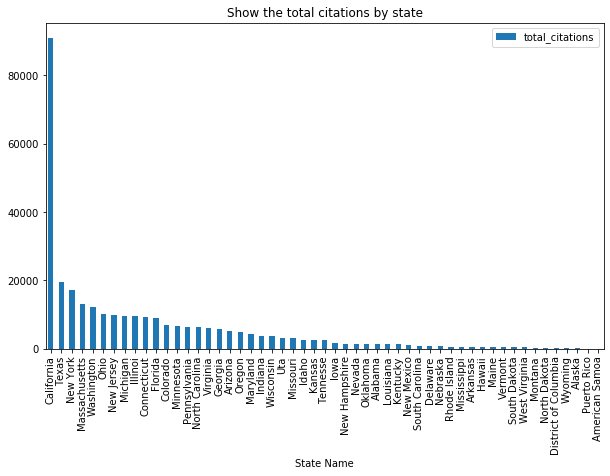

In [7]:
citations_df = df.groupby(['State Name'])['cited_by'].agg('sum').to_frame('total_citations').reset_index().sort_values(by=['total_citations'],ascending=False)
plt.rcParams['figure.figsize']=(10,6)
ax = citations_df.plot.bar(x='State Name', y='total_citations', rot=0)
plt.xticks(rotation=90)
plt.title('Show the total citations by state')
plt.show()

Join dataframes to get number of patents and number of citations to find the average

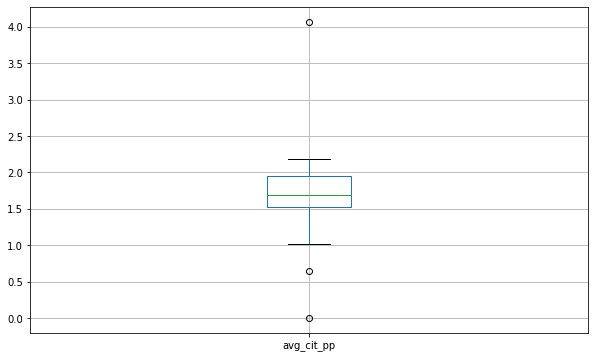

In [8]:
#Merging the data frames first
patent_and_citation_df = pd.merge(state_count, citations_df)

#Now dividing the colums to ge the average citations per patent
patent_and_citation_df['avg_cit_pp'] = (patent_and_citation_df['total_citations']/patent_and_citation_df['total_patents'])
patent_and_citation_df=patent_and_citation_df.sort_values(by=['avg_cit_pp'],ascending=False)

patent_and_citation_df.boxplot(column=["avg_cit_pp"])


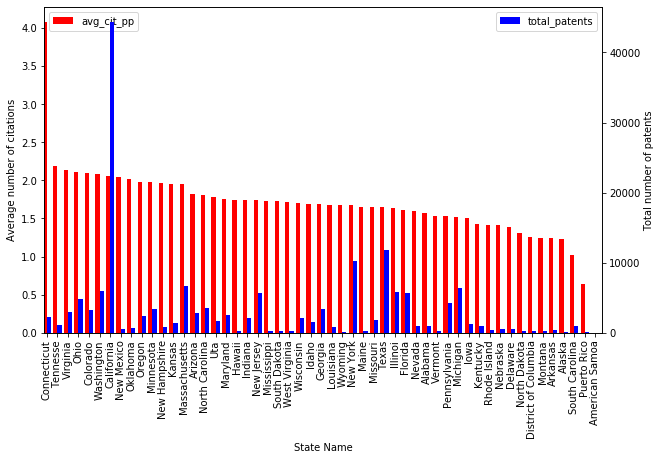

In [9]:
#Create a joint plot to show average citation agaisnt number of patents

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

patent_and_citation_df.plot(x="State Name", y=["avg_cit_pp"],kind='bar', color='red', ax=ax, width=width, position=1)
patent_and_citation_df.plot(x="State Name", y=["total_patents"],kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.legend(loc=2)
ax.set_ylabel('Average number of citations')
ax2.set_ylabel('Total number of patents')

plt.show()

## Tract Level Patents
Counting the number of patents per tract

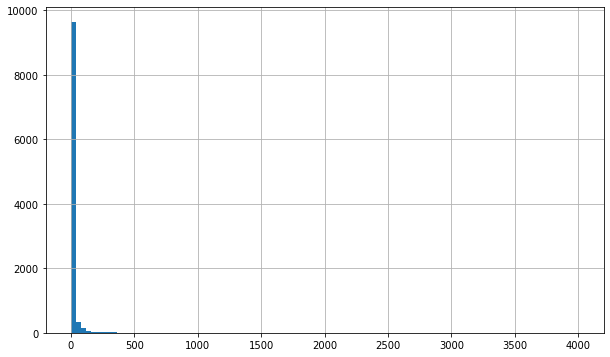

In [10]:
tract_count = df.groupby('GEOID')['patent_id'].nunique().to_frame('total_patents').reset_index().sort_values(by=['total_patents'],ascending=False)
tract_count['total_patents'].hist(bins = 100, range=[0, 4000]) #add granularity & range

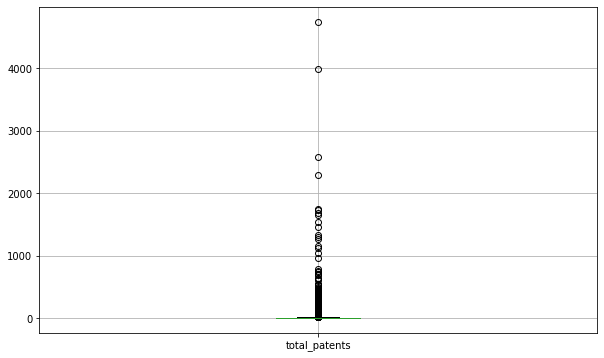

In [11]:
tract_count.boxplot(column=["total_patents"])

Plot the top 10% of patents output tracts

In [12]:
top_tracts = tract_count.nlargest(100,'total_patents')
state_tract_df = df_patent_tracts[['GEOID', 'city', 'state']].drop_duplicates()

map_top_tracts = pd.merge(top_tracts, state_tract_df, on = 'GEOID', how='left')

map_top_tracts.head()

,GEOID,total_patents,city,state
0,6.085501e+09,4746,San Jose,CA
1,6.073005e+09,3979,San Diego,CA
2,4.845300e+10,2571,Austin,TX
3,6.085509e+09,2291,Sunnyvale,CA
4,3.606100e+10,1753,New York,NY


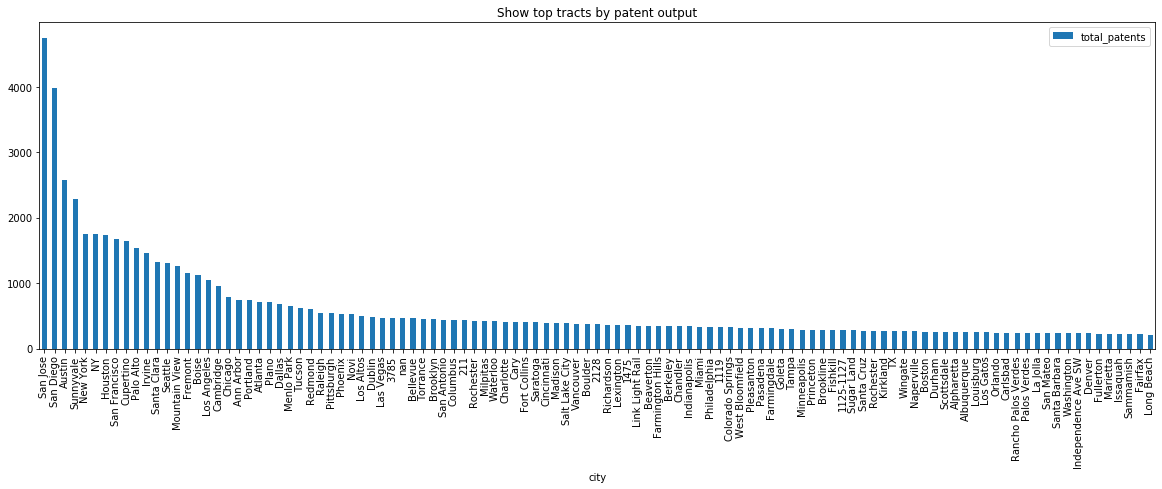

In [13]:
plt.rcParams['figure.figsize']=(20,6)
ax = map_top_tracts.plot.bar(x='city', y='total_patents', rot=0)
plt.xticks(rotation=90)
plt.title('Show top tracts by patent output')
plt.show()

## Tract Level Citations
Calculation the most number of 'cited by' at tract level, the ouput below again shows the same pattern to total output. Now we look at average citations per patent.

In [17]:
tract_citations_df = df.groupby(['GEOID'])['cited_by'].agg('sum').to_frame('total_citations').reset_index().sort_values(by=['total_citations'],ascending=False)

names_tract_citations_df = pd.merge(tract_citations_df, state_tract_df, on = 'GEOID', how='left')

names_tract_citations_df.head()

names_tract_citations_df.to_csv ('tract_patent_and_citation_df.csv', header=True)


In [18]:
#Merging the data frames first
tract_patent_and_citation_df = pd.merge(names_tract_citations_df, map_top_tracts)

#Now dividing the colums to ge the average citations per patent
tract_patent_and_citation_df['avg_cit_pp'] = (tract_patent_and_citation_df['total_citations']/tract_patent_and_citation_df['total_patents'])
tract_patent_and_citation_df=tract_patent_and_citation_df.sort_values(by=['avg_cit_pp'],ascending=False)

tract_patent_and_citation_df.head()

,GEOID,total_citations,city,state,total_patents,avg_cit_pp
12,3.906100e+10,2783,Cincinnati,OH,390,7.135897
19,6.077004e+09,1525,Waterloo,CA,414,3.683575
24,8.013012e+09,1343,2128,CO,376,3.571809
23,8.013012e+09,1343,Boulder,CO,376,3.571809
17,6.085510e+09,1759,Los Altos,CA,500,3.518000


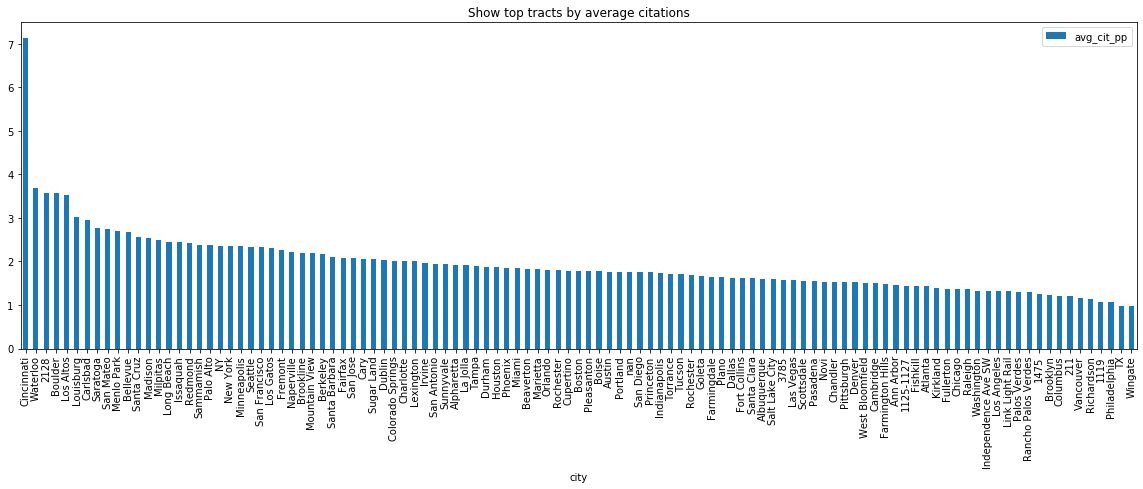

In [19]:
plt.rcParams['figure.figsize']=(20,6)
ax = tract_patent_and_citation_df.plot.bar(x='city', y='avg_cit_pp', rot=0)
plt.xticks(rotation=90)
plt.title('Show top tracts by average citations')
plt.show()

In [ ]:
df.to_csv ('patent_tract_state.csv', header=True)

## Category Desriptive Statistics

Will group the patent data by category type

In [20]:
category_cited_total = df_patent_tracts.groupby(['section_id'])['cited_by'].agg('sum').to_frame('total_citations').reset_index().sort_values(by=['total_citations'],ascending=False)
category_patent_count = df_patent_tracts.groupby('section_id')['patent_id'].nunique().to_frame('total_patents').reset_index().sort_values(by=['total_patents'],ascending=False)

category_patent_and_citation = pd.merge(category_cited_total, category_patent_count)

category_patent_and_citation['avg_cit_pp'] = (category_patent_and_citation['total_citations']/category_patent_and_citation['total_patents'])
category_patent_and_citation=category_patent_and_citation.sort_values(by=['avg_cit_pp'],ascending=False)


category_patent_and_citation

,section_id,total_citations,total_patents,avg_cit_pp
2,A,67575,30749,2.197632
0,G,102564,48864,2.098969
1,H,82221,44007,1.868362
5,E,9721,5747,1.691491
4,F,12759,8416,1.516041
3,B,21814,16960,1.286203
7,D,643,588,1.093537
6,C,7191,7610,0.944941


In [21]:
df_by_section = df.loc[df_patent_tracts['section_id'] == 'C']
section_state_count = df_by_section.groupby('State Name')['patent_id'].nunique().to_frame('total_patents').reset_index().sort_values(by=['total_patents'],ascending=False)
section_state_count


,State Name,total_patents
3,California,1630
43,Texas,540
31,New York,465
20,Massachusetts,408
29,New Jersey,379
37,Pennsylvania,337
34,Ohio,316
21,Michigan,292
12,Illinoi,224
8,Florida,222
